## Ally Heroes

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
import pandas as pd

# Paths
csv_file = "hero_win_percentages.csv"  # Path to the file containing ally/enemy win percentages
heroes_info_file = "data/heroes_info.csv"  # Path to heroes info CSV

# Load data
df = pd.read_csv(csv_file)
heroes_info_df = pd.read_csv(heroes_info_file)

# Filter heroes with at least a minimum number of matches
min_matches = 5
filtered_df_allies = df[df["Ally Matches"] >= min_matches]
filtered_df_enemies = df[df["Enemy Matches"] >= min_matches]

# Find the top 5 most wanted allies (based on win percentage and match count)
most_wanted_allies = filtered_df_allies.nlargest(5, ["Win % as Ally", "Ally Matches"])

# Find the top 5 most unwanted enemies (based on win percentage and match count)
most_unwanted_enemies = filtered_df_enemies.nlargest(5, ["Win % as Opponent", "Enemy Matches"])

# Create a mapping of Hero ID to Hero Name
hero_id_to_name = dict(zip(heroes_info_df["Hero ID"], heroes_info_df["Name"]))

# Map hero names for most wanted allies
most_wanted_allies["Hero Name"] = most_wanted_allies["Hero ID"].map(hero_id_to_name)

# Map hero names for most unwanted enemies
most_unwanted_enemies["Hero Name"] = most_unwanted_enemies["Hero ID"].map(hero_id_to_name)

# Print results
print("Most Wanted Allies:")
print(most_wanted_allies[["Hero Name", "Win % as Ally", "Ally Matches"]])

print("\nMost Unwanted Enemies:")
print(most_unwanted_enemies[["Hero Name", "Win % as Opponent", "Enemy Matches"]])


Most Wanted Allies:
        Hero Name  Win % as Ally  Ally Matches
16        ABADDON      80.000000             5
44     VENOMANCER      71.428571             7
72  FACELESS VOID      66.666667             9
26           MARS      66.666667             6
7          SNIPER      62.857143            35

Most Unwanted Enemies:
             Hero Name  Win % as Opponent  Enemy Matches
48  ANCIENT APPARITION         100.000000              6
1                 TINY          85.714286              7
49     VENGEFUL SPIRIT          84.615385             13
89         ENCHANTRESS          84.615385             13
87             SLARDAR          83.333333             12


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

# Paths
csv_file = "hero_win_percentages.csv"  # Path to the file containing ally/enemy win percentages
heroes_info_file = "data/heroes_info.csv"  # Path to heroes info CSV
hero_images_dir = "data/hero_images"  # Path to folder containing hero images

# Load data
df = pd.read_csv(csv_file)
heroes_info_df = pd.read_csv(heroes_info_file)

# Filter heroes with at least a minimum number of matches
min_matches = 5
filtered_df_allies = df[df["Ally Matches"] >= min_matches]
filtered_df_enemies = df[df["Enemy Matches"] >= min_matches]

# Find the top 5 most wanted allies (based on win percentage and match count)
most_wanted_allies = filtered_df_allies.nlargest(5, ["Win % as Ally", "Ally Matches"])

# Find the top 5 most unwanted enemies (based on win percentage and match count)
most_unwanted_enemies = filtered_df_enemies.nlargest(5, ["Win % as Opponent", "Enemy Matches"])

# Map Hero Names
most_wanted_allies = most_wanted_allies.merge(heroes_info_df, on="Hero ID", how="left")
most_unwanted_enemies = most_unwanted_enemies.merge(heroes_info_df, on="Hero ID", how="left")

# Function to load hero images
def get_hero_image(hero_name):
    # Convert hero_name to lowercase and remove spaces
    sanitized_name = hero_name.lower().replace(" ", "")
    image_path = os.path.join(hero_images_dir, f"{sanitized_name}.png")
    if os.path.exists(image_path):
        return plt.imread(image_path)  # Load the image
    return None  # Return None if image doesn't exist

# Function to add hero images to the bar
def add_images_to_bars(ax, bars, hero_names):
    for bar, hero_name in zip(bars, hero_names):
        img = get_hero_image(hero_name)
        if img is not None:
            # Place the image at the center of the bar
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_height() / 2  # Vertical center of the bar
            imagebox = OffsetImage(img, zoom=0.4)  # Adjust zoom for larger image size
            ab = AnnotationBbox(imagebox, (x, y), frameon=False, box_alignment=(0.5, 0.5))
            ax.add_artist(ab)

            # Add win percentage directly below the image
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            bar.get_height() / 2 - 10,  # Slightly below the center
            f"{win_percentage: .2f}%", 
            ha="center", 
            va="center", 
            fontsize=10, 
            color="black",  # Ensure visibility on bars
            weight="bold"
        )

# Visualization for allies
plt.figure(figsize=(12, 6))
ax_allies = plt.gca()
colors_allies = plt.cm.Blues([1.0, 0.8, 0.6, 0.4, 0.2])  # Generate blueish colors
bars = plt.bar(
    most_wanted_allies["Name"], 
    most_wanted_allies["Win % as Ally"], 
    color=colors_allies, 
    alpha=0.9
)
plt.xlabel("Hero Name")
plt.ylabel("Win Percentage as Ally")
plt.title("Top 5 Most Wanted Allies")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add images to the bars
add_images_to_bars(
    ax_allies, 
    bars, 
    most_wanted_allies["Name"]
)
plt.tight_layout()
plt.show()

# Visualization for enemies
plt.figure(figsize=(12, 6))
ax_enemies = plt.gca()
colors_enemies = plt.cm.Reds([1.0, 0.8, 0.6, 0.4, 0.2])  # Generate reddish colors
bars = plt.bar(
    most_unwanted_enemies["Name"], 
    most_unwanted_enemies["Win % as Opponent"], 
    color=colors_enemies, 
    alpha=0.9
)
plt.xlabel("Hero Name")
plt.ylabel("Win Percentage as Opponent")
plt.title("Top 5 Most Unwanted Enemies")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add images to the bars
add_images_to_bars(
    ax_enemies, 
    bars, 
    most_unwanted_enemies["Name"]
)
plt.tight_layout()
plt.show()


SyntaxError: invalid decimal literal (3232925325.py, line 55)

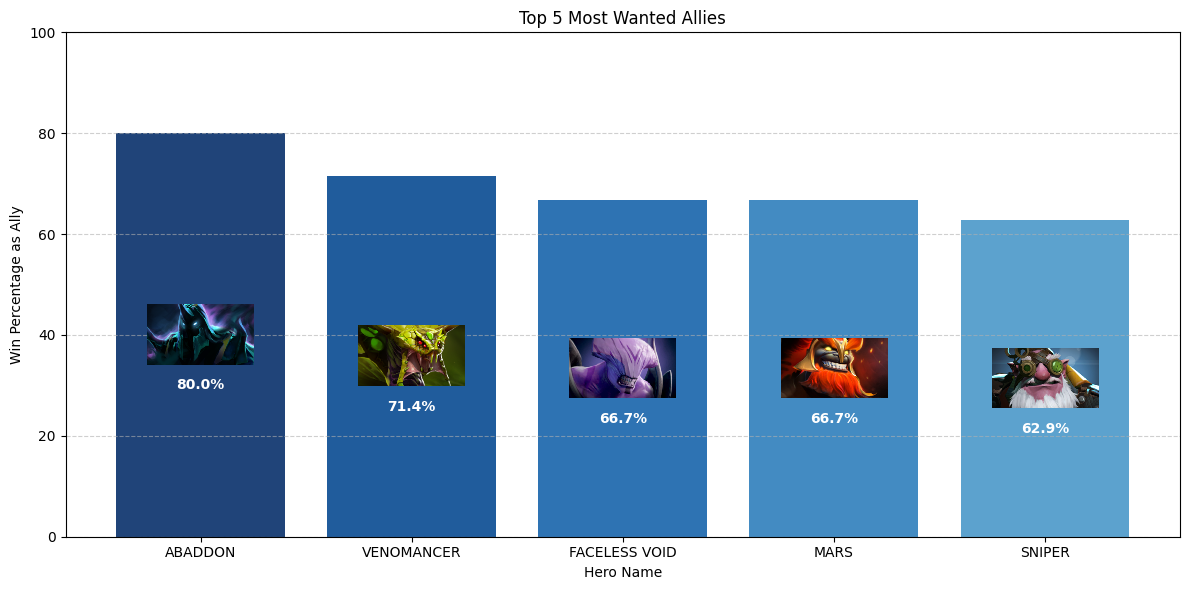

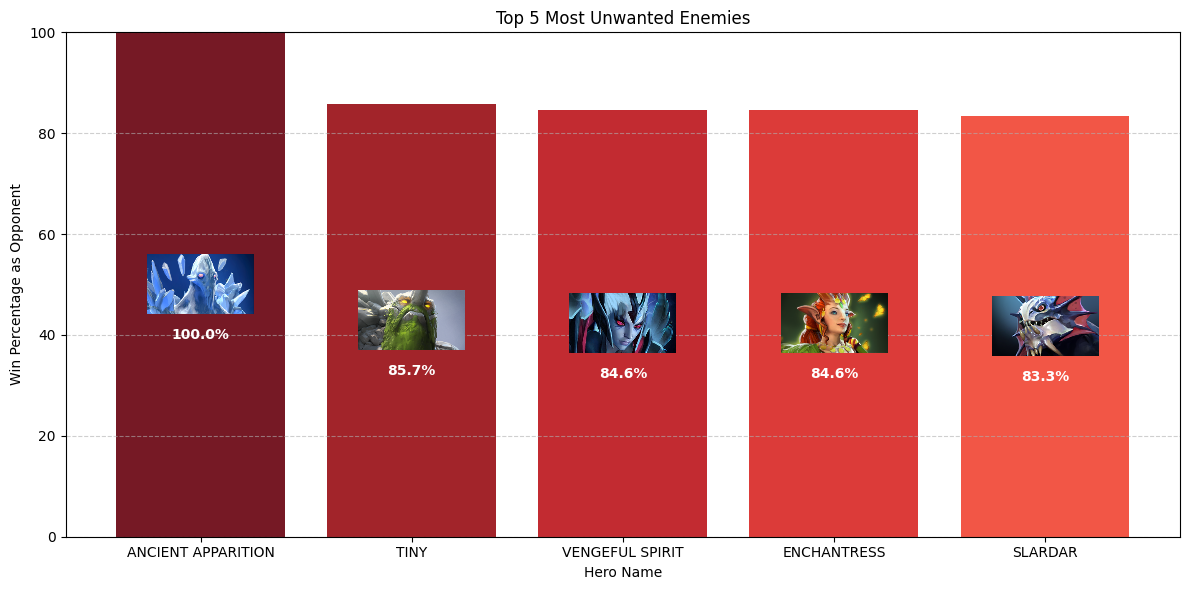

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

# Paths
csv_file = "hero_win_percentages.csv"  # Path to the file containing ally/enemy win percentages
heroes_info_file = "data/heroes_info.csv"  # Path to heroes info CSV
hero_images_dir = "data/hero_images"  # Path to folder containing hero images

# Load data
df = pd.read_csv(csv_file)
heroes_info_df = pd.read_csv(heroes_info_file)

# Filter heroes with at least a minimum number of matches
min_matches = 5
filtered_df_allies = df[df["Ally Matches"] >= min_matches]
filtered_df_enemies = df[df["Enemy Matches"] >= min_matches]

# Find the top 5 most wanted allies (based on win percentage and match count)
most_wanted_allies = filtered_df_allies.nlargest(5, ["Win % as Ally", "Ally Matches"])

# Find the top 5 most unwanted enemies (based on win percentage and match count)
most_unwanted_enemies = filtered_df_enemies.nlargest(5, ["Win % as Opponent", "Enemy Matches"])

# Map Hero Names
most_wanted_allies = most_wanted_allies.merge(heroes_info_df, on="Hero ID", how="left")
most_unwanted_enemies = most_unwanted_enemies.merge(heroes_info_df, on="Hero ID", how="left")

# Function to load hero images
def get_hero_image(hero_name):
    # Convert hero_name to lowercase and remove spaces
    sanitized_name = hero_name.lower().replace(" ", "")
    image_path = os.path.join(hero_images_dir, f"{sanitized_name}.png")
    if os.path.exists(image_path):
        return plt.imread(image_path)  # Load the image
    return None  # Return None if image doesn't exist

# Function to add hero images and win percentage to the bar
def add_images_and_text_to_bars(ax, bars, hero_names, win_percentages):
    for bar, hero_name, win_percentage in zip(bars, hero_names, win_percentages):
        img = get_hero_image(hero_name)
        if img is not None:
            # Place the image at the center of the bar
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_height() / 2  # Vertical center of the bar
            imagebox = OffsetImage(img, zoom=0.3)  # Adjust zoom for larger image size
            ab = AnnotationBbox(imagebox, (x, y + 0.05), frameon=False, box_alignment=(0.5, 0.5))
            ax.add_artist(ab)

        # Add win percentage directly below the image
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            bar.get_height() / 2 - 10,  # Slightly below the center
            f"{win_percentage:.1f}%", 
            ha="center", 
            va="center", 
            fontsize=10, 
            color="white",  # Ensure visibility on bars
            weight="bold"
        )

# Visualization for allies
plt.figure(figsize=(12, 6))
ax_allies = plt.gca()
colors_allies = plt.cm.Blues([1.0, 0.9, 0.8, 0.7, 0.6])  # Generate blueish colors
bars = plt.bar(
    most_wanted_allies["Name"], 
    most_wanted_allies["Win % as Ally"], 
    color=colors_allies, 
    alpha=0.9
)
plt.xlabel("Hero Name")
plt.ylabel("Win Percentage as Ally")
plt.title("Top 5 Most Wanted Allies")
plt.ylim(0, 100)  # Scale y-axis to 100
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add images and win percentages to the bars
add_images_and_text_to_bars(
    ax_allies, 
    bars, 
    most_wanted_allies["Name"], 
    most_wanted_allies["Win % as Ally"]
)
plt.tight_layout()
plt.show()

# Visualization for enemies
plt.figure(figsize=(12, 6))
ax_enemies = plt.gca()
colors_enemies = plt.cm.Reds([1.0, 0.9, 0.8, 0.7, 0.6])  # Generate reddish colors
bars = plt.bar(
    most_unwanted_enemies["Name"], 
    most_unwanted_enemies["Win % as Opponent"], 
    color=colors_enemies, 
    alpha=0.9
)
plt.xlabel("Hero Name")
plt.ylabel("Win Percentage as Opponent")
plt.title("Top 5 Most Unwanted Enemies")
plt.ylim(0, 100)  # Scale y-axis to 100
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add images and win percentages to the bars
add_images_and_text_to_bars(
    ax_enemies, 
    bars, 
    most_unwanted_enemies["Name"], 
    most_unwanted_enemies["Win % as Opponent"]
)
plt.tight_layout()
plt.show()


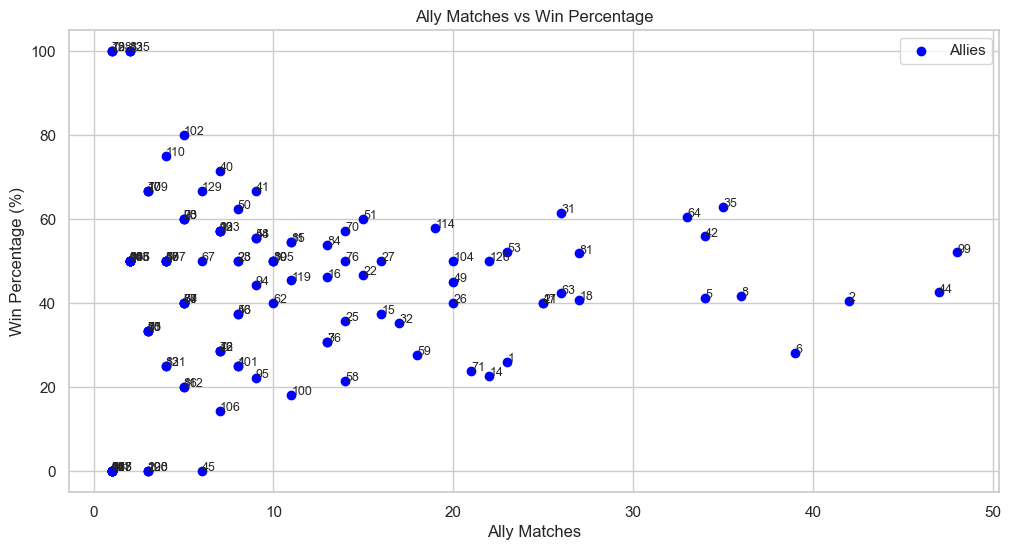

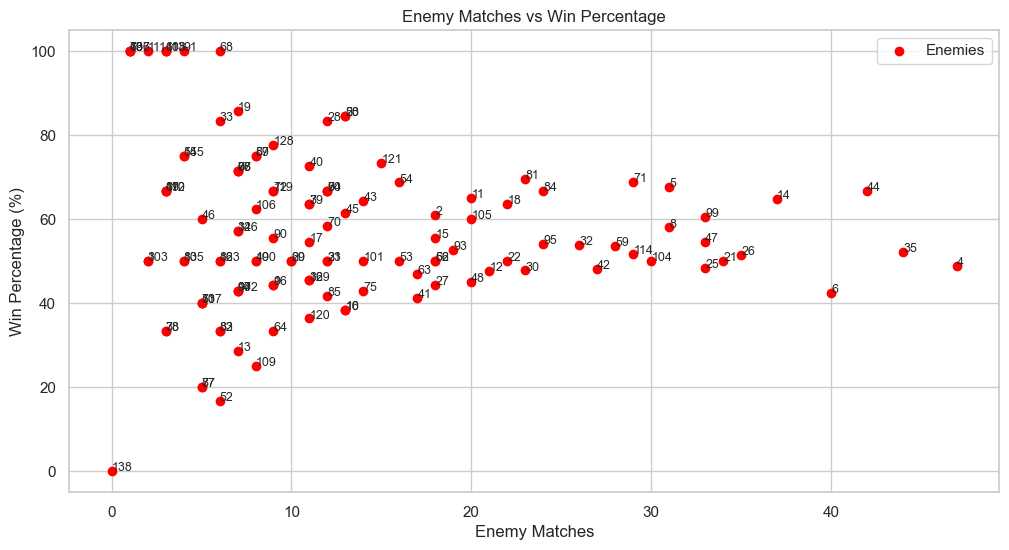

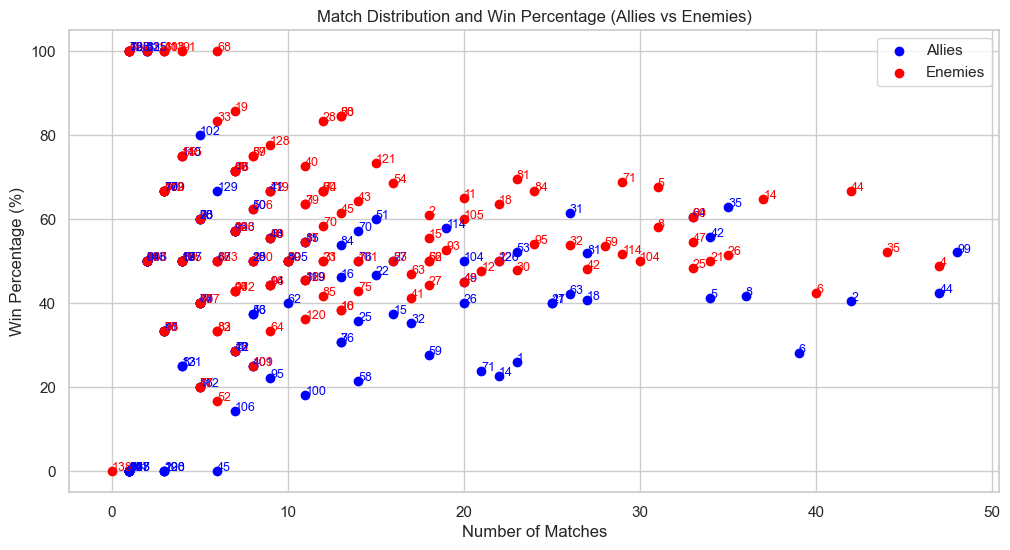

In [15]:
# Load the CSV file containing ally data
csv_file = "hero_win_percentages.csv"  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file)

# Adjusting the Hero IDs to integers
df["Hero ID"] = df["Hero ID"].astype(int)

# Sort hero IDs by win percentage and match counts for allies
data_sorted = df.sort_values(by=['Win % as Ally', 'Ally Matches'], ascending=False)

# Visualizing Allies
plt.figure(figsize=(12, 6))
plt.scatter(df["Ally Matches"], df["Win % as Ally"], color='blue', label='Allies')
for i, txt in enumerate(df["Hero ID"]):
    plt.annotate(txt, (df["Ally Matches"][i], df["Win % as Ally"][i]), fontsize=9)
plt.title("Ally Matches vs Win Percentage")
plt.xlabel("Ally Matches")
plt.ylabel("Win Percentage (%)")
plt.grid(True)
plt.legend()
plt.show()

# Visualizing Enemies
plt.figure(figsize=(12, 6))
plt.scatter(df["Enemy Matches"], df["Win % as Opponent"], color='red', label='Enemies')
for i, txt in enumerate(df["Hero ID"]):
    plt.annotate(txt, (df["Enemy Matches"][i], df["Win % as Opponent"][i]), fontsize=9)
plt.title("Enemy Matches vs Win Percentage")
plt.xlabel("Enemy Matches")
plt.ylabel("Win Percentage (%)")
plt.grid(True)
plt.legend()
plt.show()

# Combined Visualization
plt.figure(figsize=(12, 6))
plt.scatter(df["Ally Matches"], df["Win % as Ally"], color='blue', label='Allies')
plt.scatter(df["Enemy Matches"], df["Win % as Opponent"], color='red', label='Enemies')
for i, txt in enumerate(df["Hero ID"]):
    plt.annotate(txt, (df["Ally Matches"][i], df["Win % as Ally"][i]), fontsize=9, color='blue')
    plt.annotate(txt, (df["Enemy Matches"][i], df["Win % as Opponent"][i]), fontsize=9, color='red')
plt.title("Match Distribution and Win Percentage (Allies vs Enemies)")
plt.xlabel("Number of Matches")
plt.ylabel("Win Percentage (%)")
plt.grid(True)
plt.legend()
plt.show()

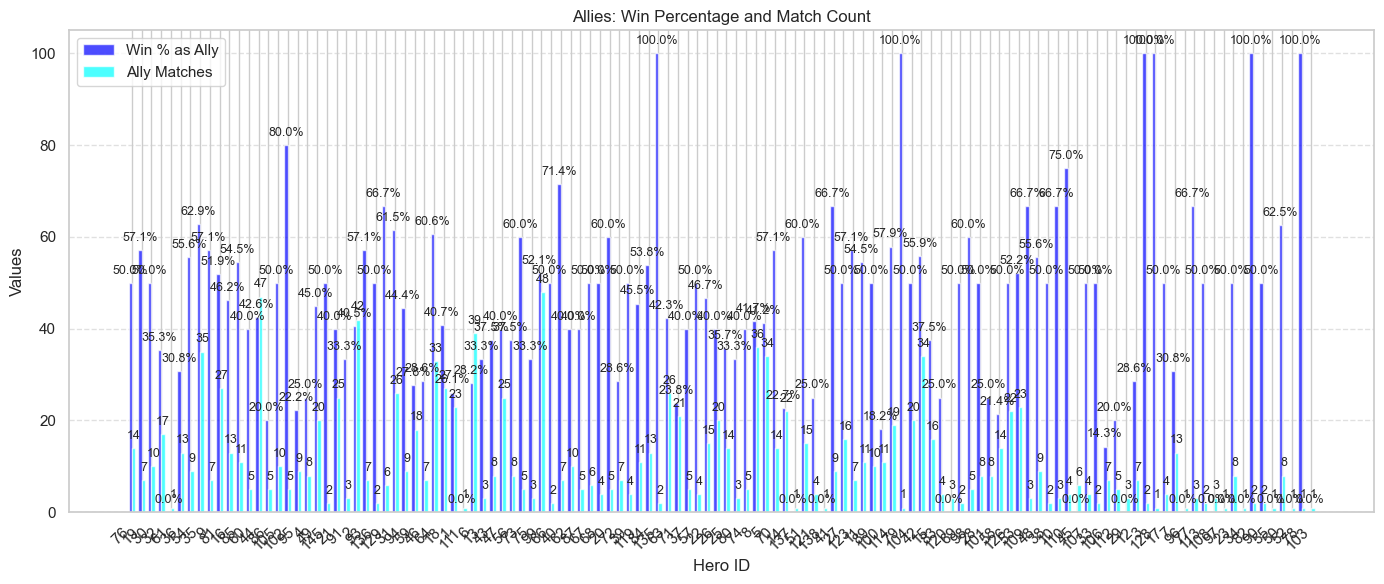

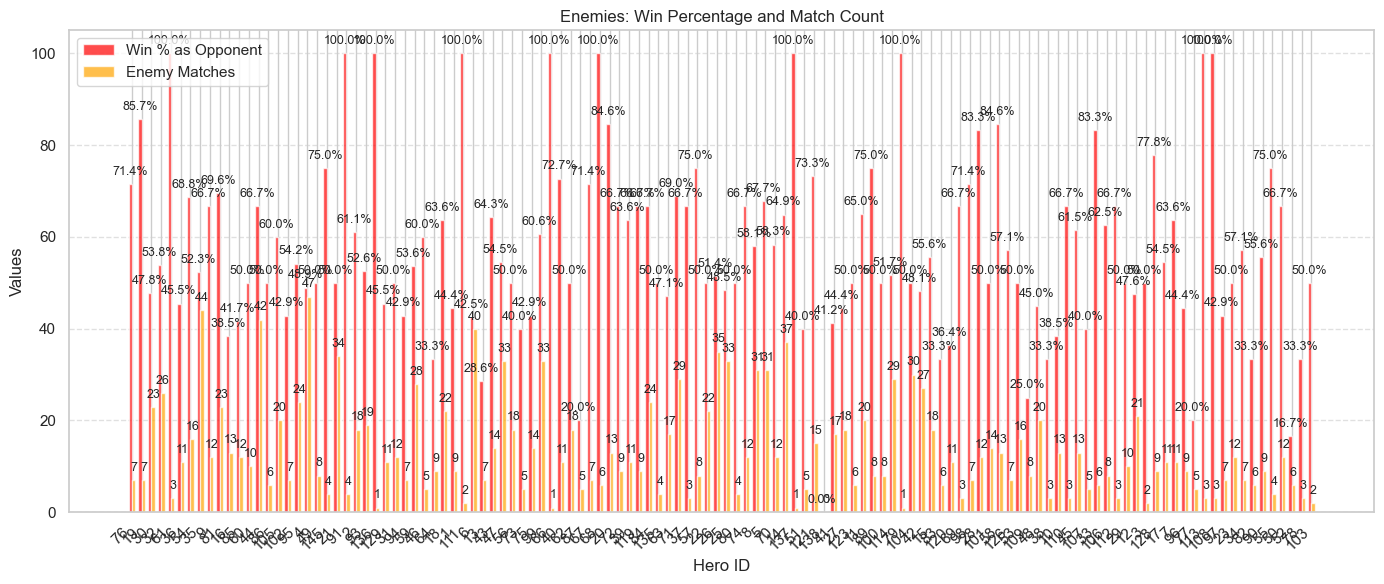

In [18]:
# Re-import numpy to avoid NameError
import numpy as np

# Define width for side-by-side bars
bar_width = 0.35
x = np.arange(len(df))  # X positions for bars

# Bar Chart for Allies
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width/2, df["Win % as Ally"], bar_width, label="Win % as Ally", color='blue', alpha=0.7)
plt.bar(x + bar_width/2, df["Ally Matches"], bar_width, label="Ally Matches", color='cyan', alpha=0.7)

# Add annotations for clarity
for i in range(len(df)):
    plt.text(x[i] - bar_width/2, df["Win % as Ally"][i] + 2, f'{df["Win % as Ally"][i]:.1f}%', ha='center', fontsize=9)
    plt.text(x[i] + bar_width/2, df["Ally Matches"][i] + 2, f'{df["Ally Matches"][i]}', ha='center', fontsize=9)

# Adjust x-axis labels to avoid overlap
plt.xticks(x, df["Hero ID"], rotation=45, ha='right')
plt.xlabel("Hero ID")
plt.ylabel("Values")
plt.title("Allies: Win Percentage and Match Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Bar Chart for Enemies
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width/2, df["Win % as Opponent"], bar_width, label="Win % as Opponent", color='red', alpha=0.7)
plt.bar(x + bar_width/2, df["Enemy Matches"], bar_width, label="Enemy Matches", color='orange', alpha=0.7)

# Add annotations for clarity
for i in range(len(df)):
    plt.text(x[i] - bar_width/2, df["Win % as Opponent"][i] + 2, f'{df["Win % as Opponent"][i]:.1f}%', ha='center', fontsize=9)
    plt.text(x[i] + bar_width/2, df["Enemy Matches"][i] + 2, f'{df["Enemy Matches"][i]}', ha='center', fontsize=9)

# Adjust x-axis labels to avoid overlap
plt.xticks(x, df["Hero ID"], rotation=45, ha='right')
plt.xlabel("Hero ID")
plt.ylabel("Values")
plt.title("Enemies: Win Percentage and Match Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



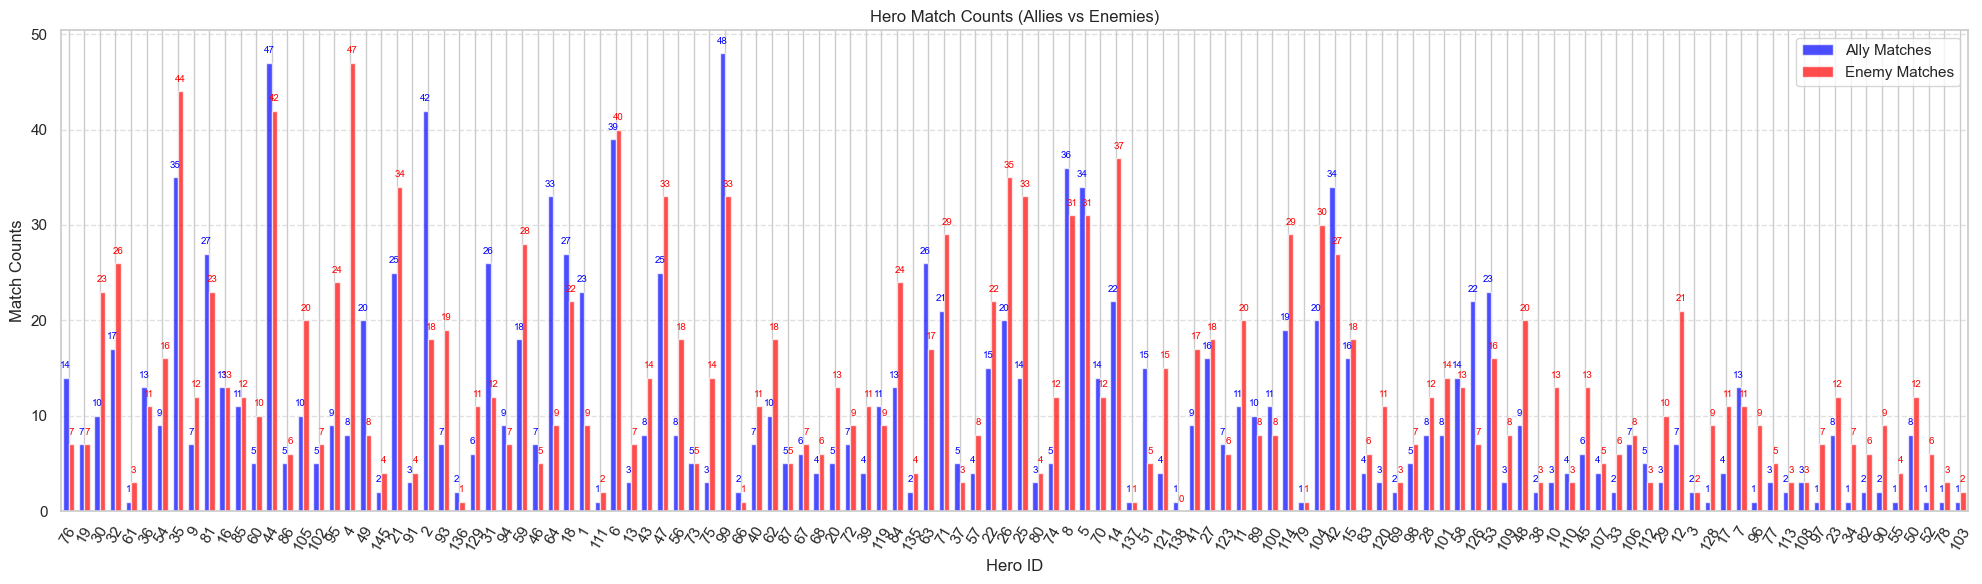

In [23]:
# Adjusted bar chart with extended x-axis for better readability

# Define width for side-by-side bars
bar_width = 0.35
x = np.arange(len(df))  # Adjusted X positions for filtered data

# Bar Chart for Match Counts
plt.figure(figsize=(20, 6))  # Increased figure width for better readability

# Ally Matches
plt.bar(x - bar_width/2, df["Ally Matches"], bar_width, label="Ally Matches", color='blue', alpha=0.7)

# Enemy Matches
plt.bar(x + bar_width/2, df["Enemy Matches"], bar_width, label="Enemy Matches", color='red', alpha=0.7)

# Add annotations for clarity
for i in range(len(df)):
    plt.text(
        x[i] - bar_width/2,
        df["Ally Matches"].iloc[i] + 1,
        f'{df["Ally Matches"].iloc[i]}',
        ha='center',
        fontsize=7,
        color='blue',
    )
    plt.text(
        x[i] + bar_width/2,
        df["Enemy Matches"].iloc[i] + 1,
        f'{df["Enemy Matches"].iloc[i]}',
        ha='center',
        fontsize=7,
        color='red',
    )

# Adjust x-axis labels to avoid overlap and set Hero IDs
plt.xticks(x, df["Hero ID"], rotation=60)  # Rotate for better readability
plt.xlabel("Hero ID")
plt.ylabel("Match Counts")
plt.title("Hero Match Counts (Allies vs Enemies)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Remove empty space by setting x-axis limits
plt.xlim(-0.5, len(df) - 0.5)  # Tighten x-axis limits to the range of data

plt.tight_layout()
plt.show()


# 2- Performance gain visualization for played heroes

### Barchart for visualizing performance label for different match numbers. 
-Match number refers to the match number that I played that specific hero. So for match_number 1; I collect my first match with hero A, my first match with hero B... etc.

/var/folders/x_/tk76_rn11w574pd1z_bqn_3h0000gn/T/ipykernel_36131/683540231.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='match_number', y='normalized_performance', data=hero_data, inner='quartile', palette='muted')


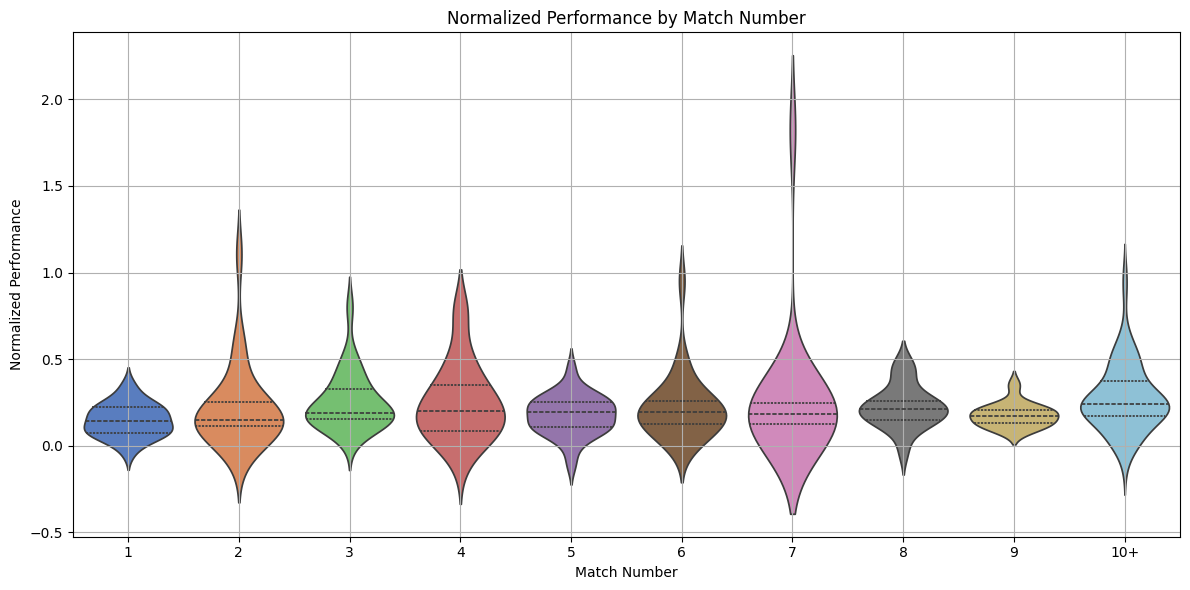

In [43]:
import numpy as np
import seaborn as sns
# Load the CSV file
hero_data = pd.read_csv("data/visualization_purposes/my_hero_data_with_match_numbers.csv")
hero_data['match_number'] = hero_data['match_number'].apply(lambda x: '10+' if int(x) >= 10 else str(x))

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='match_number', y='normalized_performance', data=hero_data, inner='quartile', palette='muted')

# Add title and labels
plt.title('Normalized Performance by Match Number')
plt.xlabel('Match Number')
plt.ylabel('Normalized Performance')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/x_/tk76_rn11w574pd1z_bqn_3h0000gn/T/ipykernel_36131/1448402931.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='match_number', y='normalized_performance', data=hero_data, palette='muted')


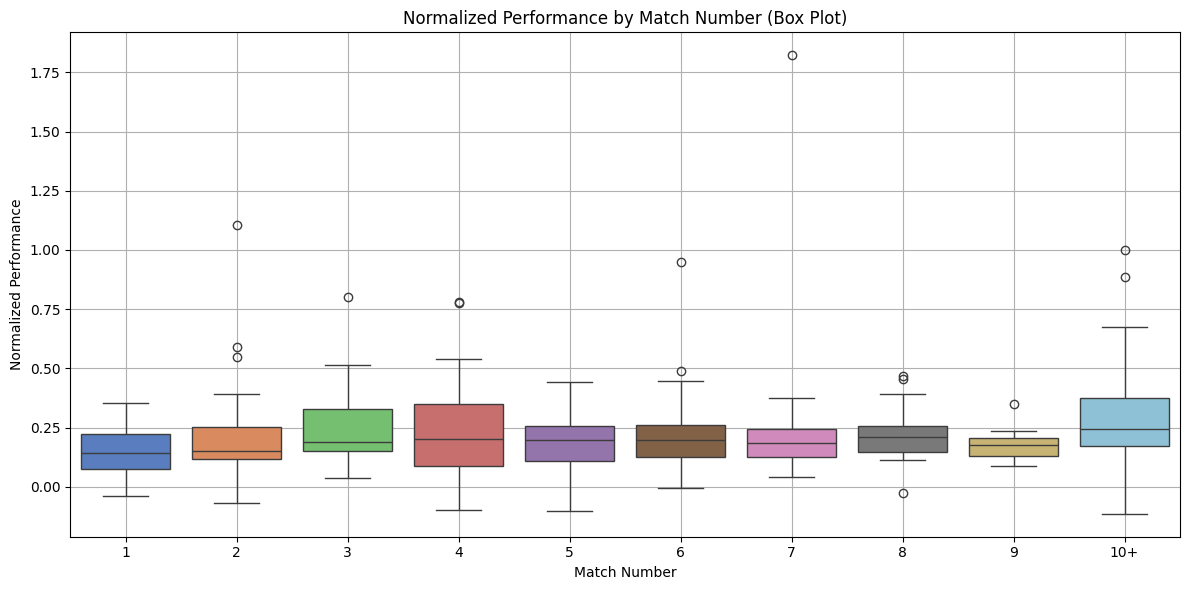

In [44]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming hero_data is already loaded, create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='match_number', y='normalized_performance', data=hero_data, palette='muted')

# Add title and labels
plt.title('Normalized Performance by Match Number (Box Plot)')
plt.xlabel('Match Number')
plt.ylabel('Normalized Performance')
plt.grid(True)
plt.tight_layout()
plt.show()


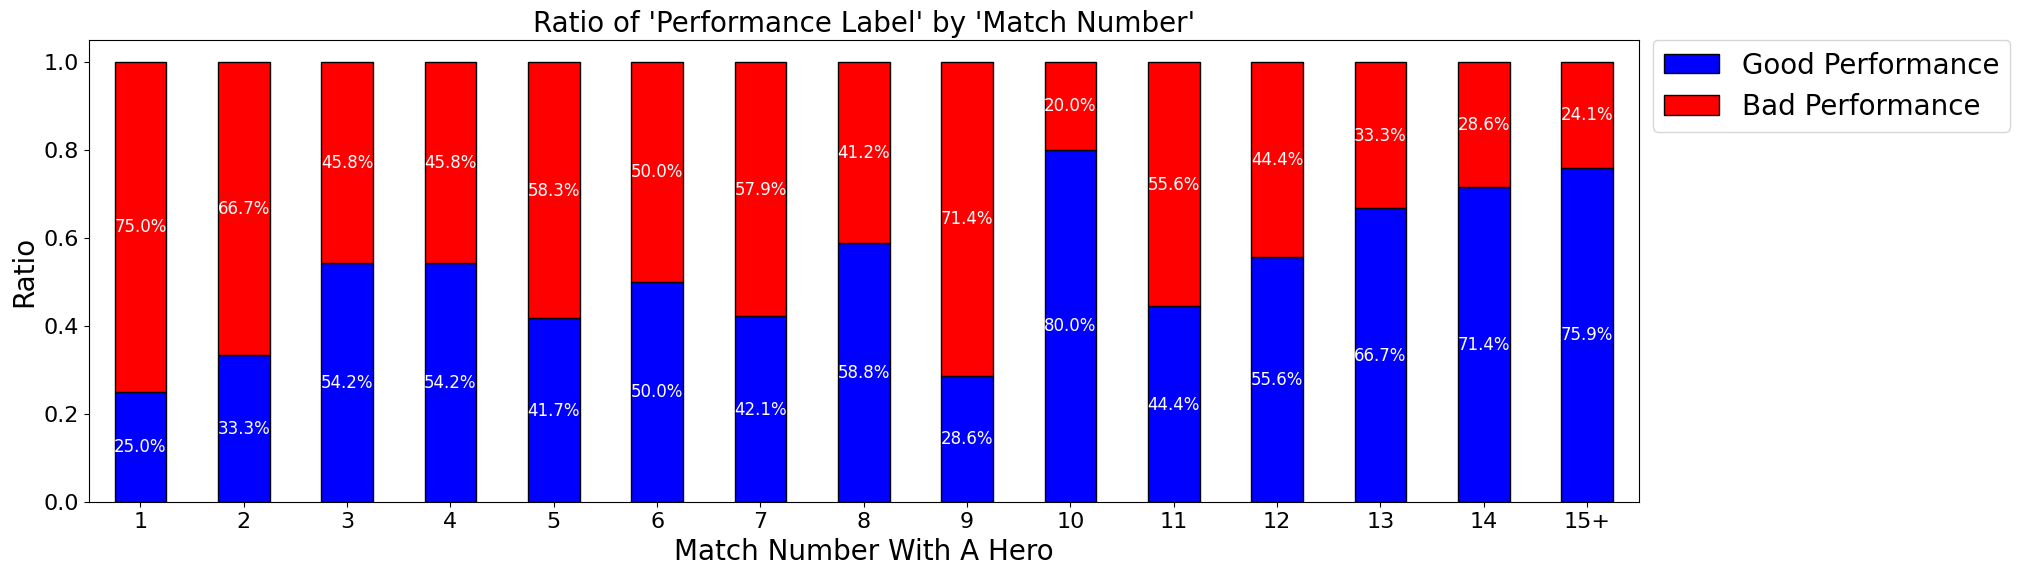

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
input_csv = "data/visualization_purposes/my_hero_data_with_match_numbers.csv"

# Load the CSV file
all_data = pd.read_csv(input_csv)

def normalize(row: pd.Series, chosen_col: str, columns: list[str]=["good", "bad"]) -> float:
    target_val = row[chosen_col] if pd.isna(row[chosen_col]) == False else 0
    opposite_column_indx = 1 if columns[0] == chosen_col else 0
    opposite_column_val = row[columns[opposite_column_indx]] if pd.isna(row[columns[opposite_column_indx]]) == False else 0
    return target_val / (opposite_column_val + target_val)

# Merge match numbers greater than or equal to 15 and label them as "15+"
all_data['match_number'] = all_data['match_number'].apply(lambda x: '15+' if int(x) >= 15 else str(x))

fig, ax = plt.subplots(figsize=(20, 6), dpi=100)
df_vis = all_data.groupby(by=["match_number", "performance_label"]).size().unstack()
df_vis["good_norm"] = df_vis.apply(lambda x: normalize(x, "good"), axis=1)
df_vis["bad_norm"] = df_vis.apply(lambda x: normalize(x, "bad"), axis=1)
df_vis.drop(columns=["good", "bad"], inplace=True)
df_vis.rename(columns={"good_norm": "Good Performance", "bad_norm": "Bad Performance"}, inplace=True)

# Ensure the x-axis labels are in increasing order with "15+" at the end
df_vis = df_vis.reindex(sorted(df_vis.index, key=lambda x: (int(x[:-1]) if x.endswith('+') else int(x))))

# Plot with specified colors
df_vis.plot(kind="bar", stacked=True, ax=ax, edgecolor="black", color=["blue", "red"])

# Add percentages on bars
for i in range(len(df_vis)):
    good_perc = df_vis["Good Performance"].iloc[i] * 100
    bad_perc = df_vis["Bad Performance"].iloc[i] * 100
    ax.text(i, df_vis["Good Performance"].iloc[i] / 2, f'{good_perc:.1f}%', ha='center', va='center', color='white', fontsize=12)
    ax.text(i, df_vis["Good Performance"].iloc[i] + df_vis["Bad Performance"].iloc[i] / 2, f'{bad_perc:.1f}%', ha='center', va='center', color='white', fontsize=12)

ax.yaxis.set_tick_params(labelsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.set_xlabel("Match Number With A Hero", fontsize=20)
ax.set_ylabel("Ratio", fontsize=20)
ax.set_title("Ratio of 'Performance Label' by 'Match Number'", fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9), fontsize=20)

# Adjust x-axis labels to be linear and horizontal
plt.xticks(rotation=0)

plt.show()

### Barchart for visualizing win ratio for different match numbers. 
-Match number refers to the match number that I played that specific hero. So for match_number 1; I collect my first match with hero A, my first match with hero B... etc.

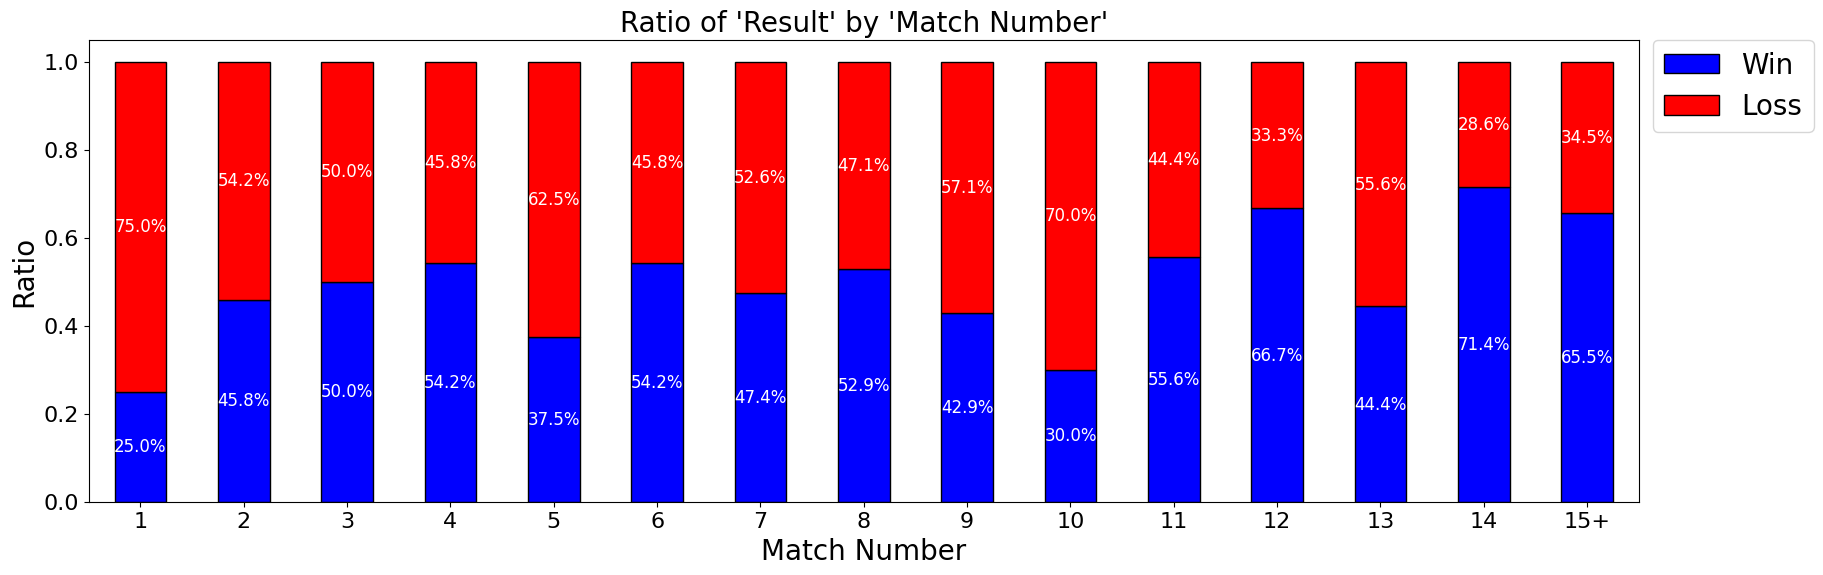

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
input_csv = "data/visualization_purposes/my_hero_data_with_match_numbers.csv"

# Load the CSV file
all_data = pd.read_csv(input_csv)

def normalize(row: pd.Series, chosen_col: str, columns: list[str]=["win", "loss"]) -> float:
    target_val = row[chosen_col] if pd.isna(row[chosen_col]) == False else 0
    opposite_column_indx = 1 if columns[0] == chosen_col else 0
    opposite_column_val = row[columns[opposite_column_indx]] if pd.isna(row[columns[opposite_column_indx]]) == False else 0
    return target_val / (opposite_column_val + target_val)

# Merge match numbers greater than or equal to 15 and label them as "15+"
all_data['match_number'] = all_data['match_number'].apply(lambda x: '15+' if int(x) >= 15 else str(x))

fig, ax = plt.subplots(figsize=(20, 6), dpi=100)
df_vis = all_data.groupby(by=["match_number", "result"]).size().unstack()
df_vis["win_norm"] = df_vis.apply(lambda x: normalize(x, "win"), axis=1)
df_vis["loss_norm"] = df_vis.apply(lambda x: normalize(x, "loss"), axis=1)
df_vis.drop(columns=["win", "loss"], inplace=True)
df_vis.rename(columns={"win_norm": "Win", "loss_norm": "Loss"}, inplace=True)

# Ensure the x-axis labels are in increasing order with "15+" at the end
df_vis = df_vis.reindex(sorted(df_vis.index, key=lambda x: (int(x[:-1]) if x.endswith('+') else int(x))))

# Plot with specified colors
df_vis.plot(kind="bar", stacked=True, ax=ax, edgecolor="black", color=["blue", "red"])

# Add percentages on bars
for i in range(len(df_vis)):
    good_perc = df_vis["Win"].iloc[i] * 100
    bad_perc = df_vis["Loss"].iloc[i] * 100
    ax.text(i, df_vis["Win"].iloc[i] / 2, f'{good_perc:.1f}%', ha='center', va='center', color='white', fontsize=12)
    ax.text(i, df_vis["Win"].iloc[i] + df_vis["Loss"].iloc[i] / 2, f'{bad_perc:.1f}%', ha='center', va='center', color='white', fontsize=12)

ax.yaxis.set_tick_params(labelsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.set_xlabel("Match Number", fontsize=20)
ax.set_ylabel("Ratio", fontsize=20)
ax.set_title("Ratio of 'Result' by 'Match Number'", fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9), fontsize=20)
# Adjust x-axis labels to be linear and horizontal
plt.xticks(rotation=0)

plt.show()

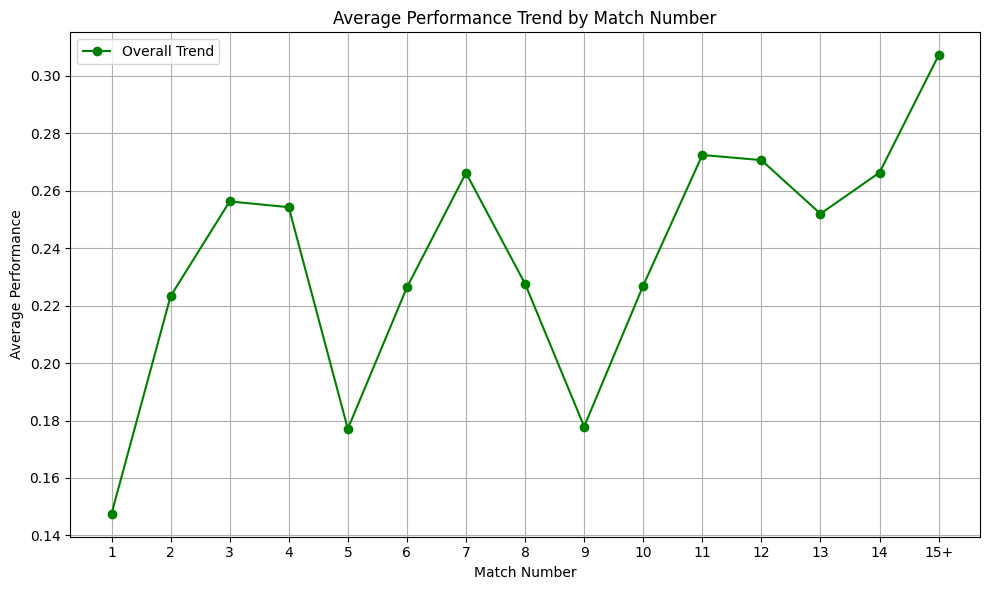

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
input_csv = "data/visualization_purposes/my_hero_data_with_match_numbers.csv"

# Load the CSV file
filtered_data = pd.read_csv(input_csv)

""""
# Step 1: Visualize performance trends for each hero
plt.figure(figsize=(10, 6))
for hero_id, hero_data in filtered_data.groupby("my_hero_id"):
    plt.plot(hero_data["match_number"], hero_data["normalized_performance"], marker="o", label=f"Hero {hero_id}")

plt.title("Performance Trend by Match Number (Heroes Played > 5 Times)")
plt.xlabel("Match Number")
plt.ylabel("Performance")
plt.legend(title="Hero ID", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend to the right
plt.grid(True)
plt.tight_layout()
plt.show()
"""

# Merge match numbers greater than or equal to 15 and label them as "15+"
filtered_data['match_number'] = filtered_data['match_number'].apply(lambda x: '15+' if int(x) >= 15 else str(x))

# Step 2: Aggregate and analyze overall trend
# Calculate average performance per match number
overall_trend = filtered_data.groupby("match_number")["normalized_performance"].mean()

# Ensure the x-axis labels are in increasing order with "15+" at the end
overall_trend = overall_trend.reindex(sorted(overall_trend.index, key=lambda x: (int(x[:-1]) if x.endswith('+') else int(x))))

# Plot the overall trend
plt.figure(figsize=(10, 6))
plt.plot(overall_trend.index, overall_trend.values, marker="o", color="green", label="Overall Trend")
plt.title("Average Performance Trend by Match Number")
plt.xlabel("Match Number")
plt.ylabel("Average Performance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### gold_per_min and xp_per_min are also good representers of performance
- Let's visualize trends

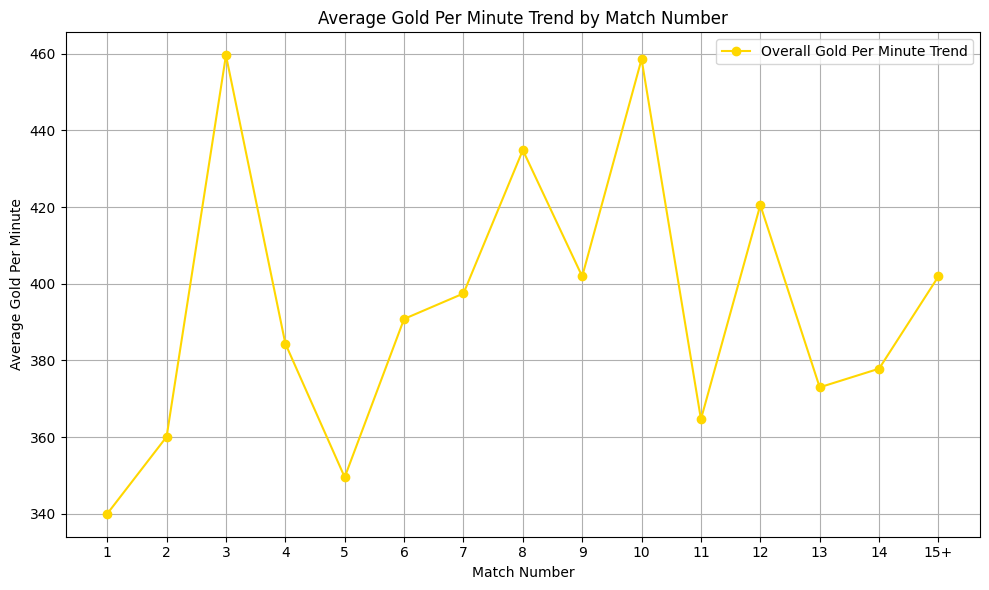

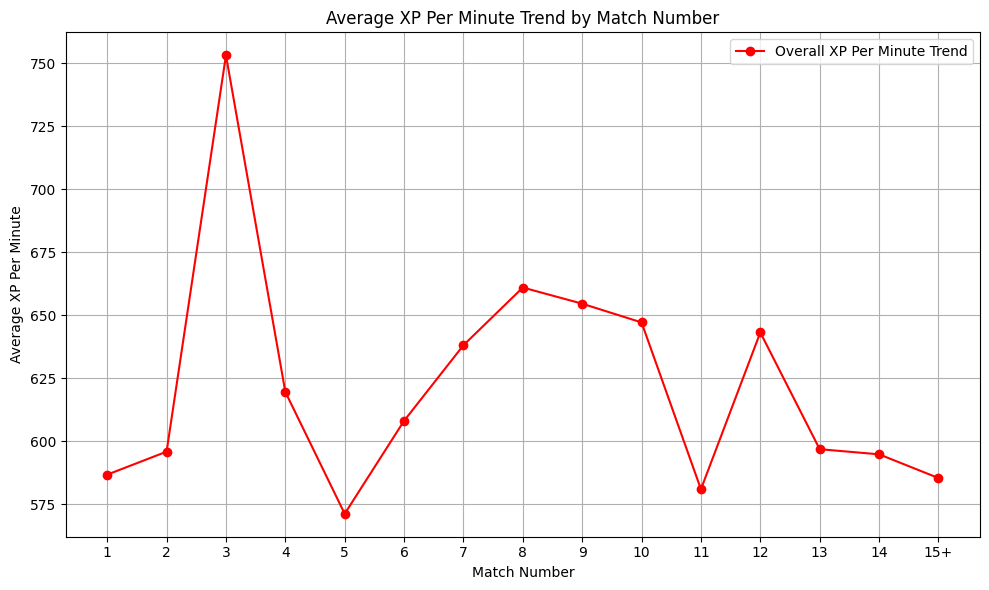

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
input_csv = "data/visualization_purposes/my_hero_data_with_match_numbers.csv"

# Load the CSV file
filtered_data_gpm_xpm = pd.read_csv(input_csv)
# Merge match numbers greater than or equal to 15 and label them as "15+"
filtered_data_gpm_xpm['match_number'] = filtered_data_gpm_xpm['match_number'].apply(lambda x: '15+' if int(x) >= 15 else str(x))


# Step 1: Aggregate and analyze overall trend for gold_per_min
overall_gold_trend = filtered_data_gpm_xpm.groupby("match_number")["gold_per_min"].mean()

# Ensure the x-axis labels are in increasing order with "15+" at the end
overall_gold_trend = overall_gold_trend.reindex(sorted(overall_gold_trend.index, key=lambda x: (int(x[:-1]) if x.endswith('+') else int(x))))


# Plot the overall trend for gold_per_min
plt.figure(figsize=(10, 6))
plt.plot(overall_gold_trend.index, overall_gold_trend.values, marker="o", color="gold", label="Overall Gold Per Minute Trend")
plt.title("Average Gold Per Minute Trend by Match Number")
plt.xlabel("Match Number")
plt.ylabel("Average Gold Per Minute")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Step 2: Aggregate and analyze overall trend for xp_per_min
overall_xp_trend = filtered_data_gpm_xpm.groupby("match_number")["xp_per_min"].mean()

# Ensure the x-axis labels are in increasing order with "15+" at the end
overall_xp_trend = overall_xp_trend.reindex(sorted(overall_xp_trend.index, key=lambda x: (int(x[:-1]) if x.endswith('+') else int(x))))

# Plot the overall trend for xp_per_min
plt.figure(figsize=(10, 6))
plt.plot(overall_xp_trend.index, overall_xp_trend.values, marker="o", color="red", label="Overall XP Per Minute Trend")
plt.title("Average XP Per Minute Trend by Match Number")
plt.xlabel("Match Number")
plt.ylabel("Average XP Per Minute")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 3- Duration of the match - win relation visualization

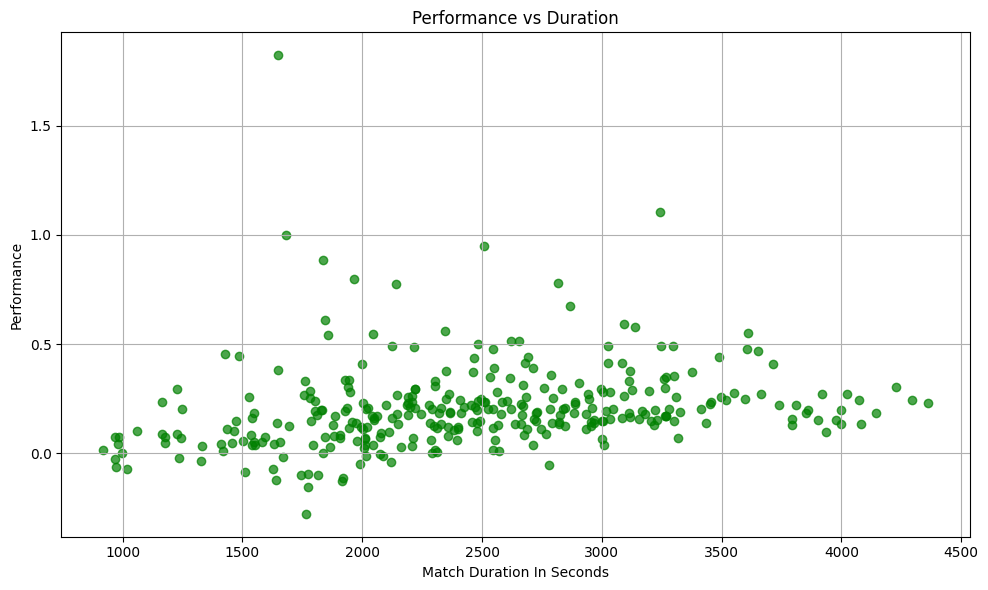

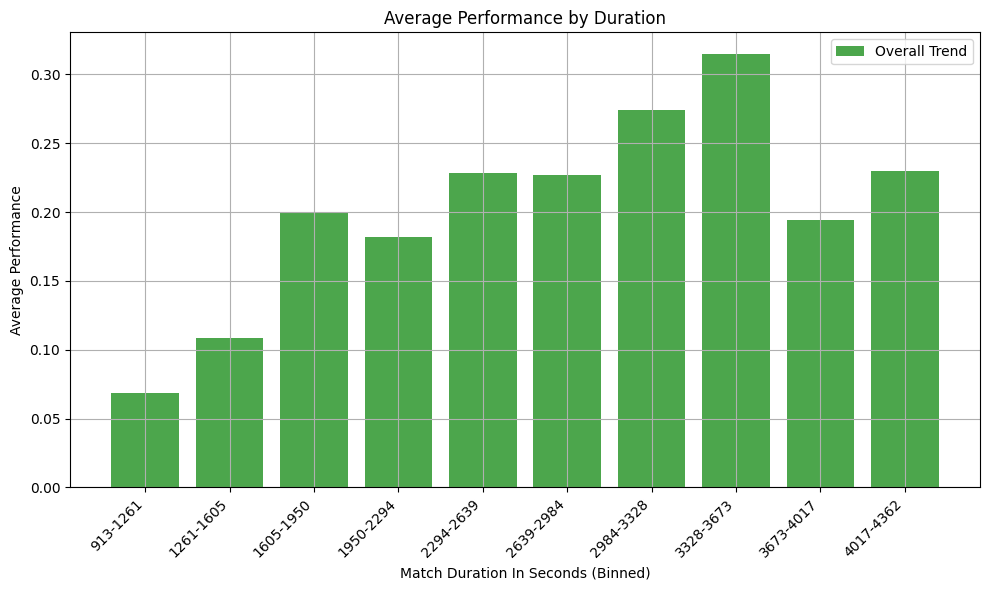

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
input_csv = "data/visualization_purposes/performance_with_duration.csv"

# Load the CSV file
filtered_data = pd.read_csv(input_csv)

# Remove extreme points with very high duration values
filtered_data = filtered_data[filtered_data["duration"] < filtered_data["duration"].quantile(0.99)]

# Step 1: Scatter plot for duration vs performance
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data["duration"], filtered_data["normalized_performance"], alpha=0.7, color="green")
plt.title("Performance vs Duration")
plt.xlabel("Match Duration In Seconds")
plt.ylabel("Performance")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Aggregate and analyze overall trend
# Calculate average performance for duration bins
filtered_data["duration_bin"] = pd.cut(filtered_data["duration"], bins=10)  # Bin durations into 10 intervals
overall_trend = filtered_data.groupby("duration_bin", observed=False)["normalized_performance"].mean()  # Explicitly set observed=False

# Plot the overall trend
plt.figure(figsize=(10, 6))
overall_trend_index = [f"{interval.left:.0f}-{interval.right:.0f}" for interval in overall_trend.index]  # Format bin ranges
plt.bar(overall_trend_index, overall_trend.values, color="green", alpha=0.7, label="Overall Trend")
plt.title("Average Performance by Duration")
plt.xlabel("Match Duration In Seconds (Binned)")
plt.ylabel("Average Performance")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 4- Performance change within one seat for playing visualization

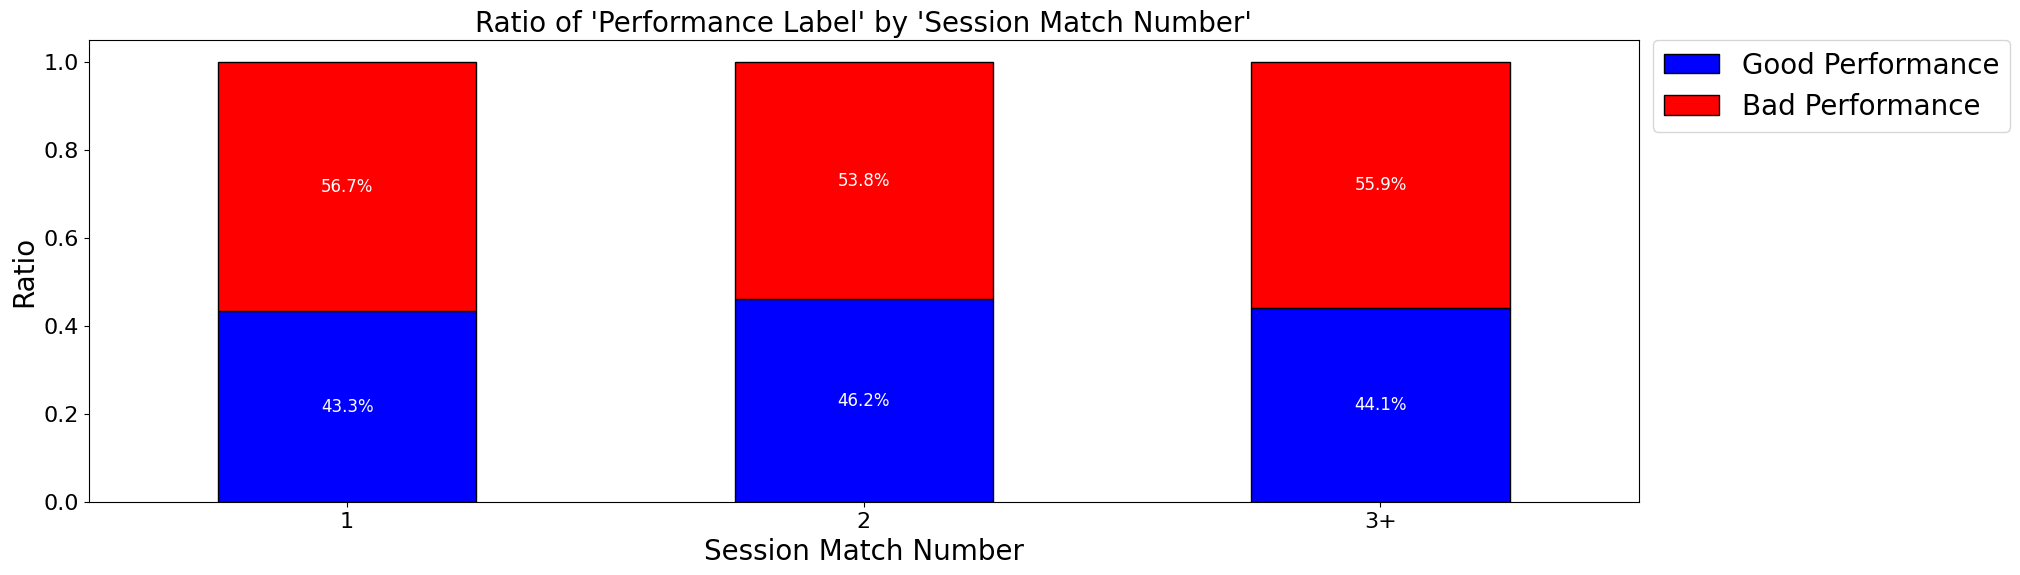

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
input_csv = "data/visualization_purposes/session_analysis.csv"

# Load the CSV file
all_data = pd.read_csv(input_csv)

def normalize(row: pd.Series, chosen_col: str, columns: list[str]=["good", "bad"]) -> float:
    target_val = row[chosen_col] if pd.isna(row[chosen_col]) == False else 0
    opposite_column_indx = 1 if columns[0] == chosen_col else 0
    opposite_column_val = row[columns[opposite_column_indx]] if pd.isna(row[columns[opposite_column_indx]]) == False else 0
    return target_val / (opposite_column_val + target_val)

# Merge session match numbers greater than or equal to 3 and label them as "3+"
all_data['session_match_number'] = all_data['session_match_number'].apply(lambda x: '3+' if int(x) >= 3 else str(x))

fig, ax = plt.subplots(figsize=(20, 6), dpi=100)
df_vis = all_data.groupby(by=["session_match_number", "performance_label"]).size().unstack()
df_vis["good_norm"] = df_vis.apply(lambda x: normalize(x, "good"), axis=1)
df_vis["bad_norm"] = df_vis.apply(lambda x: normalize(x, "bad"), axis=1)
df_vis.drop(columns=["good", "bad"], inplace=True)
df_vis.rename(columns={"good_norm": "Good Performance", "bad_norm": "Bad Performance"}, inplace=True)

# Ensure the x-axis labels are in increasing order with "3+" at the end
df_vis = df_vis.reindex(sorted(df_vis.index, key=lambda x: (int(x[:-1]) if x.endswith('+') else int(x))))

# Plot with specified colors
df_vis.plot(kind="bar", stacked=True, ax=ax, edgecolor="black", color=["blue", "red"])

# Add percentages on bars
for i in range(len(df_vis)):
    good_perc = df_vis["Good Performance"].iloc[i] * 100
    bad_perc = df_vis["Bad Performance"].iloc[i] * 100
    ax.text(i, df_vis["Good Performance"].iloc[i] / 2, f'{good_perc:.1f}%', ha='center', va='center', color='white', fontsize=12)
    ax.text(i, df_vis["Good Performance"].iloc[i] + df_vis["Bad Performance"].iloc[i] / 2, f'{bad_perc:.1f}%', ha='center', va='center', color='white', fontsize=12)

ax.yaxis.set_tick_params(labelsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.set_xlabel("Session Match Number", fontsize=20)
ax.set_ylabel("Ratio", fontsize=20)
ax.set_title("Ratio of 'Performance Label' by 'Session Match Number'", fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9), fontsize=20)
# Adjust x-axis labels to be linear and horizontal
plt.xticks(rotation=0)

plt.show()

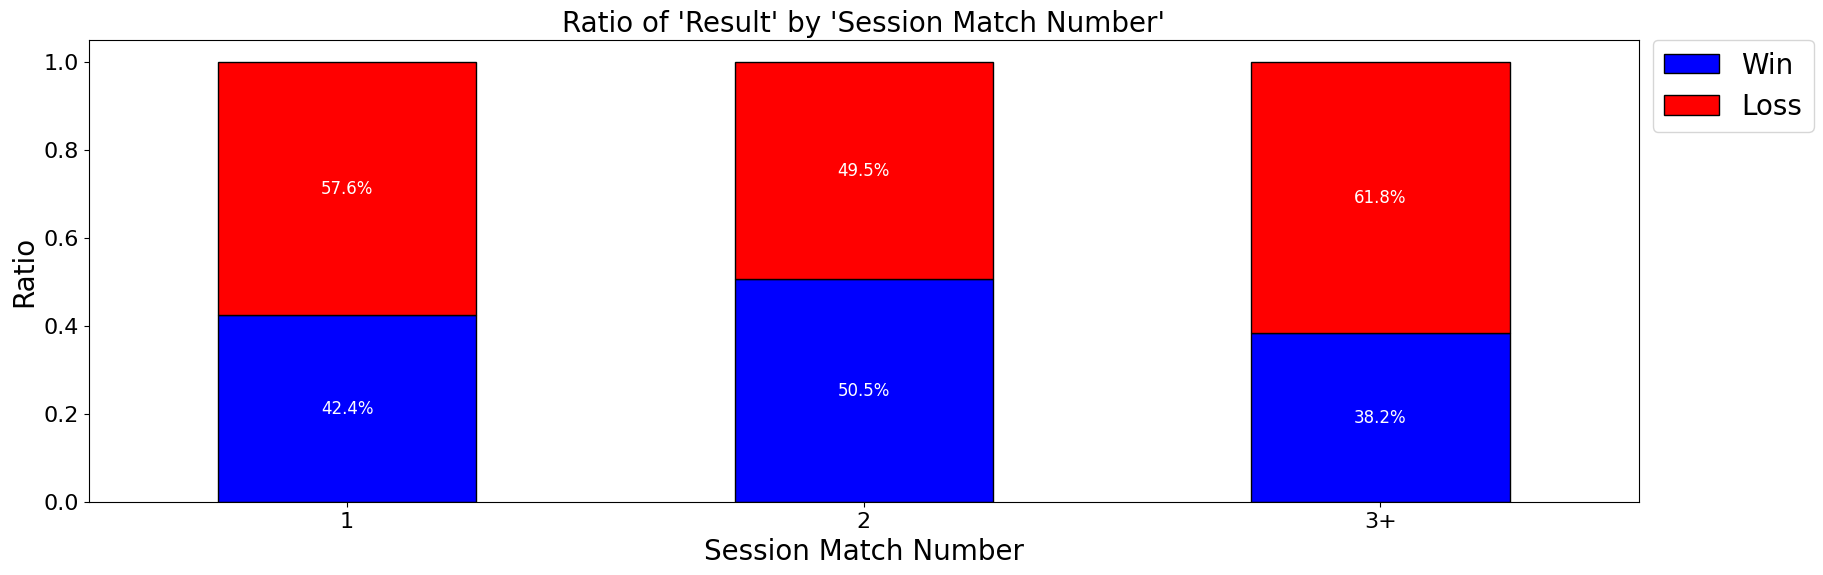

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
input_csv = "data/visualization_purposes/session_analysis.csv"

# Load the CSV file
all_data = pd.read_csv(input_csv)

def normalize(row: pd.Series, chosen_col: str, columns: list[str]=["win", "loss"]) -> float:
    target_val = row[chosen_col] if pd.isna(row[chosen_col]) == False else 0
    opposite_column_indx = 1 if columns[0] == chosen_col else 0
    opposite_column_val = row[columns[opposite_column_indx]] if pd.isna(row[columns[opposite_column_indx]]) == False else 0
    return target_val / (opposite_column_val + target_val)

# Merge session match numbers greater than or equal to 3 and label them as "3+"
all_data['session_match_number'] = all_data['session_match_number'].apply(lambda x: '3+' if int(x) >= 3 else str(x))

fig, ax = plt.subplots(figsize=(20, 6), dpi=100)
df_vis = all_data.groupby(by=["session_match_number", "result"]).size().unstack()
df_vis["win_norm"] = df_vis.apply(lambda x: normalize(x, "win"), axis=1)
df_vis["loss_norm"] = df_vis.apply(lambda x: normalize(x, "loss"), axis=1)
df_vis.drop(columns=["win", "loss"], inplace=True)
df_vis.rename(columns={"win_norm": "Win", "loss_norm": "Loss"}, inplace=True)

# Ensure the x-axis labels are in increasing order with "3+" at the end
df_vis = df_vis.reindex(sorted(df_vis.index, key=lambda x: (int(x[:-1]) if x.endswith('+') else int(x))))

# Plot with specified colors
df_vis.plot(kind="bar", stacked=True, ax=ax, edgecolor="black", color=["blue", "red"])

# Add percentages on bars
for i in range(len(df_vis)):
    good_perc = df_vis["Win"].iloc[i] * 100
    bad_perc = df_vis["Loss"].iloc[i] * 100
    ax.text(i, df_vis["Win"].iloc[i] / 2, f'{good_perc:.1f}%', ha='center', va='center', color='white', fontsize=12)
    ax.text(i, df_vis["Win"].iloc[i] + df_vis["Loss"].iloc[i] / 2, f'{bad_perc:.1f}%', ha='center', va='center', color='white', fontsize=12)

ax.yaxis.set_tick_params(labelsize=16)
ax.xaxis.set_tick_params(labelsize=16)
ax.set_xlabel("Session Match Number", fontsize=20)
ax.set_ylabel("Ratio", fontsize=20)
ax.set_title("Ratio of 'Result' by 'Session Match Number'", fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9), fontsize=20)
# Adjust x-axis labels to be linear and horizontal
plt.xticks(rotation=0)

plt.show()

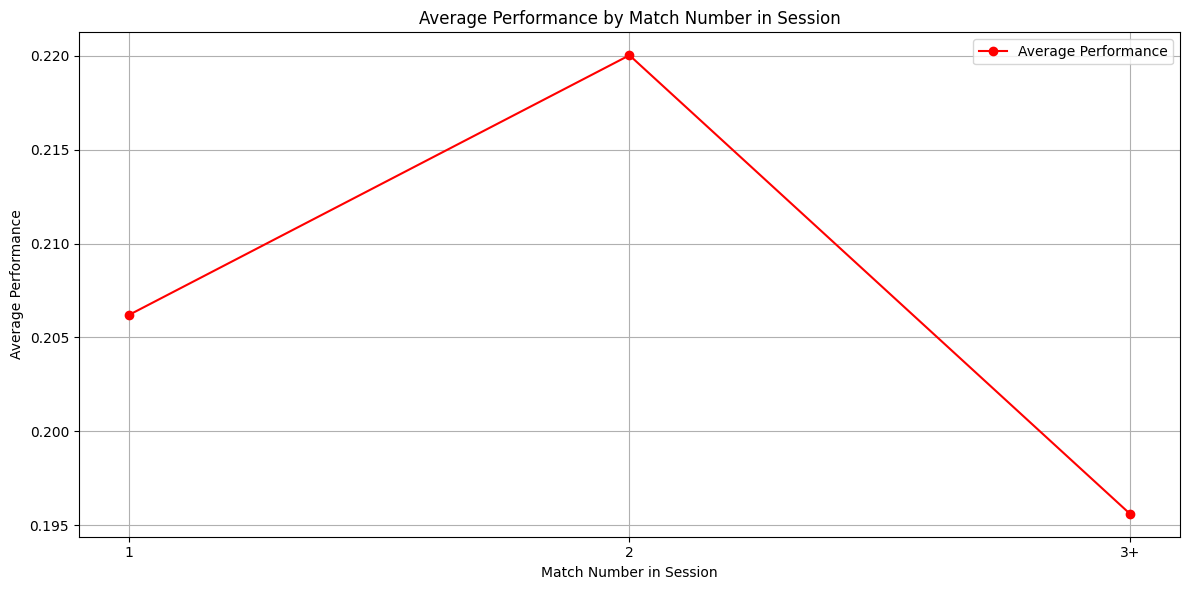

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
input_csv = "data/visualization_purposes/session_analysis.csv"

# Load the CSV file
all_data = pd.read_csv(input_csv)
# Merge session match numbers greater than or equal to 3 and label them as "3+"
all_data['session_match_number'] = all_data['session_match_number'].apply(lambda x: '3+' if int(x) >= 3 else str(x))

# Calculate average performance for each match number across all sessions
average_performance = all_data.groupby("session_match_number")["normalized_performance"].mean()

# Ensure the x-axis labels are in increasing order with "15+" at the end
average_performance = average_performance.reindex(sorted(average_performance.index, key=lambda x: (int(x[:-1]) if x.endswith('+') else int(x))))


# Plot the average performance trend
plt.figure(figsize=(12, 6))
plt.plot(average_performance.index, average_performance.values, marker="o", color="red", label="Average Performance")
plt.title("Average Performance by Match Number in Session")
plt.xlabel("Match Number in Session")
plt.ylabel("Average Performance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()